# Using Lets-Plot to create Scatter Matrix

This is an advanced example demonstrating the technique that can be used to plot **Scatter Matrix** using *GGBunch* feature of *lets-plot* library.


In [1]:
import numpy as np
import pandas as pd

In [2]:
from itertools import *

In [3]:
from sklearn.datasets import load_iris

iris_bunch = load_iris()

X, y = pd.DataFrame(iris_bunch.data, columns=iris_bunch.feature_names), iris_bunch.target

In [4]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

X = X_train

### What is a scatter matrix?

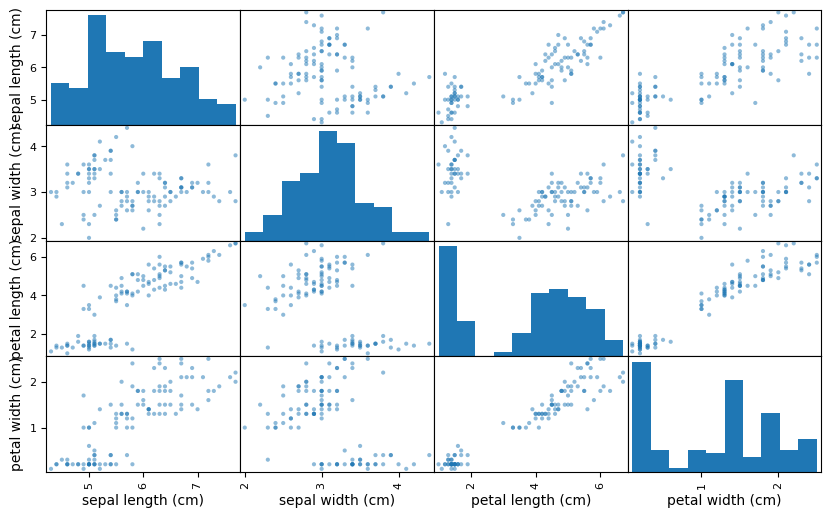

In [5]:
from pandas.plotting import scatter_matrix

scatter_matrix(X, figsize=(10,6));

In [6]:
features = X.columns.values

### Lets-Plot

In [7]:
from lets_plot import *

In [8]:
LetsPlot.setup_html()

### Scatter plot

In [9]:
ggplot(data=X) + geom_point(aes(x=features[0], y=features[1])) + ggsize(200, 200)

### Histogram

In [10]:
ggplot(data=X) + geom_histogram(aes(x=features[0])) + ggsize(200, 200)

### Histogram for empirical density

In [11]:
ggplot(data=X) + geom_histogram(aes(features[0], y='..density..')) + ggsize(200, 200)

### Histogram with density plot

In [12]:
ggplot(data=X) \
        + geom_histogram(aes(features[0], y='..density..'), alpha=0.7) \
        + geom_density(aes(features[0]), color='red', linetype='dashed', size=1) \
        + ggsize(200, 200)

We want y labels only for the left-most blocks and x labels only for the bottom-most blocks. 

In [13]:
def scatter_plot(data, feat1, feat2, x_lab= True, y_lab = True, width=200, height=200):
    p = ggplot(data) + geom_point(aes(feat1, feat2)) + ggsize(width, height)
    if not x_lab:
        p += labs(x='')
    if not y_lab:
        p += labs(y='')

    p += theme_void()
    return p

In [14]:
def hist(data, feat, x_lab= True, y_lab = True, width=200, height=200):
    p = ggplot(data) + geom_histogram(aes(feat, '..density..'), alpha=0.7) + ggsize(width, height) \
        + geom_density(aes(feat), color='red', linetype='dashed', size=1)
    if not x_lab:
        p += labs(x='')
    if not y_lab:
        p += labs(y='')
    else:
        p += labs(y=feat)

    p += theme_void()
    return p

### Make a scatter matrix using `GGBunch`

In [15]:
features = X.columns.values
n_feat = len(features)

bunch = GGBunch()

x0, y0 = 0, 0
row, col = 0, 0
width, height = 160, 160
step = width + 5
x_lab, y_lab = True, True

for i in range(n_feat**2):
    if col == n_feat:
        col = 0
        row += 1
    x_lab = (row == n_feat - 1)
    y_lab = (col == 0)
    if col == row:
        plot = hist(X, features[row], x_lab, y_lab, width, height)
    else:
        plot = scatter_plot(X, features[col], features[row], x_lab, y_lab, width, height)
    bunch.add_plot(plot, x0 + col*step, y0 + row*step, width, height)
    col += 1
bunch.show()